# Diamond data analysis and price prediction

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [4]:
data=pd.read_csv('Documents/Data science/diamonds.csv')
data2=data.copy()

In [5]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [6]:
data2.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
data2.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [8]:
data2['Unnamed: 0']

0            1
1            2
2            3
3            4
4            5
5            6
6            7
7            8
8            9
9           10
10          11
11          12
12          13
13          14
14          15
15          16
16          17
17          18
18          19
19          20
20          21
21          22
22          23
23          24
24          25
25          26
26          27
27          28
28          29
29          30
         ...  
53910    53911
53911    53912
53912    53913
53913    53914
53914    53915
53915    53916
53916    53917
53917    53918
53918    53919
53919    53920
53920    53921
53921    53922
53922    53923
53923    53924
53924    53925
53925    53926
53926    53927
53927    53928
53928    53929
53929    53930
53930    53931
53931    53932
53932    53933
53933    53934
53934    53935
53935    53936
53936    53937
53937    53938
53938    53939
53939    53940
Name: Unnamed: 0, Length: 53940, dtype: int64

In [9]:
data2=data2.drop('Unnamed: 0',axis=1)

In [10]:
data2.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [11]:
data2.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [12]:
data2.shape

(53940, 10)

In [13]:
data2.drop_duplicates(keep='first',inplace=True)

In [14]:
data2.describe(include='O')

,cut,color,clarity
count,53794,53794,53794
unique,5,7,8
top,Ideal,G,SI1
freq,21488,11262,13032


In [15]:
data2['cut']

0            Ideal
1          Premium
2             Good
3          Premium
4             Good
5        Very Good
6        Very Good
7        Very Good
8             Fair
9        Very Good
10            Good
11           Ideal
12         Premium
13           Ideal
14         Premium
15         Premium
16           Ideal
17            Good
18            Good
19       Very Good
20            Good
21       Very Good
22       Very Good
23       Very Good
24       Very Good
25       Very Good
26         Premium
27       Very Good
28       Very Good
29       Very Good
           ...    
53910      Premium
53911      Premium
53912      Premium
53913         Good
53914         Good
53915        Ideal
53916         Good
53917    Very Good
53918      Premium
53919        Ideal
53920    Very Good
53921    Very Good
53922    Very Good
53923        Ideal
53924        Ideal
53925        Ideal
53926        Ideal
53927         Good
53928      Premium
53929        Ideal
53930      Premium
53931      P

In [16]:
data2['color']

0        E
1        E
2        E
3        I
4        J
5        J
6        I
7        H
8        E
9        H
10       J
11       J
12       F
13       J
14       E
15       E
16       I
17       J
18       J
19       J
20       I
21       E
22       H
23       J
24       J
25       G
26       I
27       J
28       D
29       F
        ..
53910    E
53911    E
53912    F
53913    G
53914    I
53915    E
53916    D
53917    J
53918    I
53919    I
53920    E
53921    E
53922    D
53923    I
53924    I
53925    I
53926    E
53927    F
53928    E
53929    G
53930    E
53931    F
53932    E
53933    E
53934    D
53935    D
53936    D
53937    D
53938    H
53939    D
Name: color, Length: 53794, dtype: object

In [17]:
data2['clarity']

0         SI2
1         SI1
2         VS1
3         VS2
4         SI2
5        VVS2
6        VVS1
7         SI1
8         VS2
9         VS1
10        SI1
11        VS1
12        SI1
13        SI2
14        SI2
15         I1
16        SI2
17        SI1
18        SI1
19        SI1
20        SI2
21        VS2
22        VS1
23        SI1
24        SI1
25       VVS2
26        VS1
27        VS2
28        VS2
29        VS1
         ... 
53910     SI1
53911      IF
53912    VVS1
53913     VS2
53914     VS1
53915     SI2
53916     SI1
53917     SI1
53918     VS1
53919    VVS1
53920     VS2
53921     VS2
53922     VS1
53923     VS2
53924     VS2
53925     SI1
53926     SI1
53927     SI1
53928     SI2
53929     VS1
53930     SI1
53931     SI1
53932     VS2
53933     VS2
53934     SI1
53935     SI1
53936     SI1
53937     SI1
53938     SI2
53939     SI2
Name: clarity, Length: 53794, dtype: object

In [18]:
data2.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [19]:
data2['cut'].value_counts()

Ideal        21488
Premium      13748
Very Good    12069
Good          4891
Fair          1598
Name: cut, dtype: int64

In [20]:
data2['clarity'].value_counts()

SI1     13032
VS2     12229
SI2      9150
VS1      8156
VVS2     5056
VVS1     3647
IF       1784
I1        740
Name: clarity, dtype: int64

In [21]:
data2

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [22]:
correlation=data2.corr()
correlation

,carat,depth,table,price,x,y,z
carat,1.000000,0.027861,0.181091,0.921548,0.975380,0.951908,0.953542
depth,0.027861,1.000000,-0.297669,-0.011048,-0.025348,-0.029389,0.094757
table,0.181091,-0.297669,1.000000,0.126566,0.194855,0.183231,0.150270
price,0.921548,-0.011048,0.126566,1.000000,0.884504,0.865395,0.861208
x,0.975380,-0.025348,0.194855,0.884504,1.000000,0.974592,0.970686
y,0.951908,-0.029389,0.183231,0.865395,0.974592,1.000000,0.951844
z,0.953542,0.094757,0.150270,0.861208,0.970686,0.951844,1.000000


In [23]:
cut_percentage=pd.crosstab(index=data2['cut'],columns='count',normalize=True)
cut_percentage

col_0,count
cut,
Fair,0.029706
Good,0.090921
Ideal,0.399450
Premium,0.255568
Very Good,0.224356


In [24]:
cut_price=pd.crosstab(index=data2['price'],columns=data2['cut'],margins=True,normalize='index')
cut_price

cut,Fair,Good,Ideal,Premium,Very Good
price,,,,,
326,0.000000,0.000000,0.500000,0.500000,0.000000
327,0.000000,1.000000,0.000000,0.000000,0.000000
334,0.000000,0.000000,0.000000,1.000000,0.000000
335,0.000000,1.000000,0.000000,0.000000,0.000000
336,0.000000,0.000000,0.000000,0.000000,1.000000
337,0.500000,0.000000,0.000000,0.000000,0.500000
338,0.000000,0.000000,0.000000,0.000000,1.000000
339,0.000000,1.000000,0.000000,0.000000,0.000000
340,0.000000,0.000000,1.000000,0.000000,0.000000


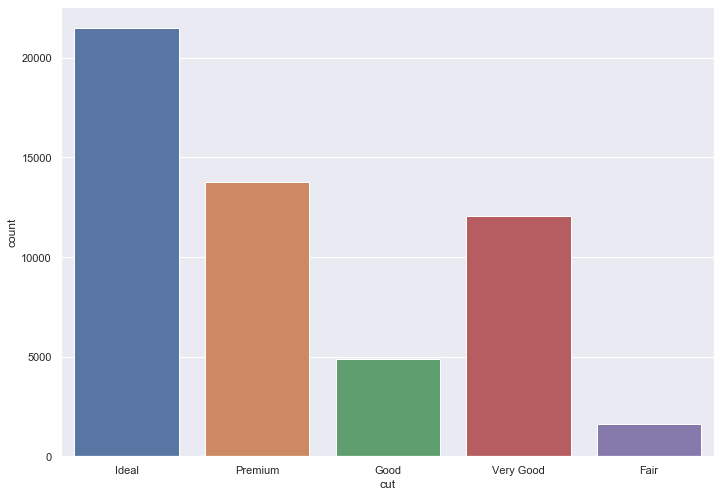

In [25]:
cut=sns.countplot(data2['cut'])

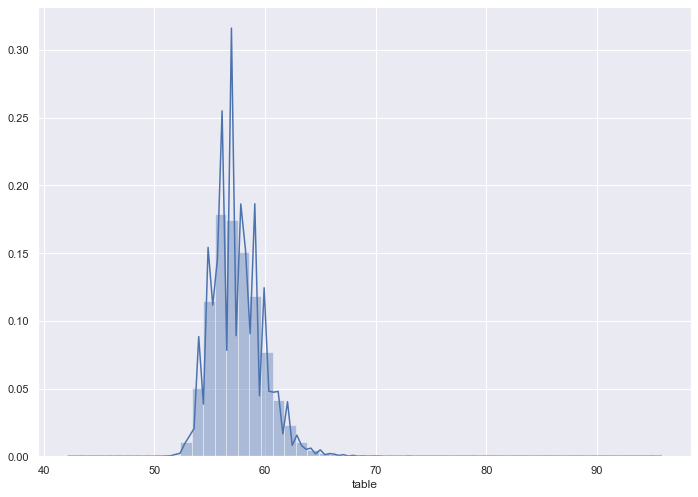

In [26]:
sns.distplot(data2['table'])

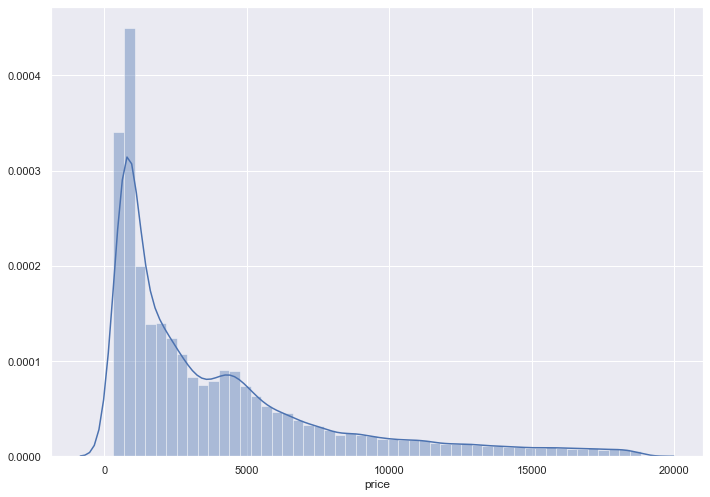

In [27]:
sns.distplot(data2['price'])

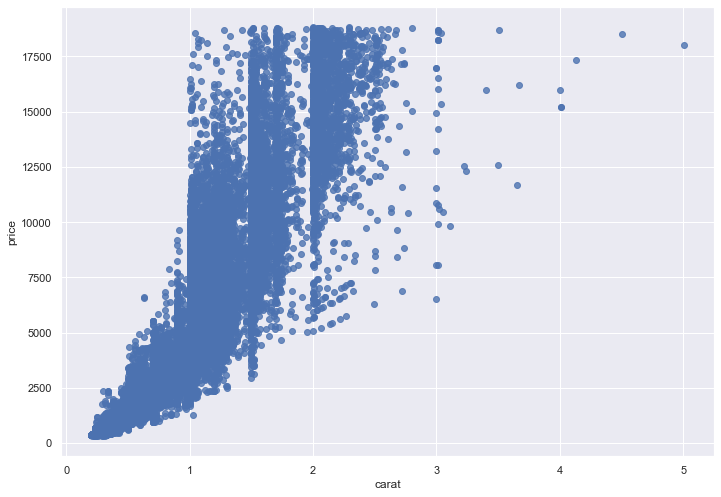

In [28]:
sns.regplot('carat','price',scatter=True,fit_reg=False,data=data2)

In [29]:
data2['price'].describe()

count    53794.000000
mean      3933.065082
std       3988.114460
min        326.000000
25%        951.000000
50%       2401.000000
75%       5326.750000
max      18823.000000
Name: price, dtype: float64

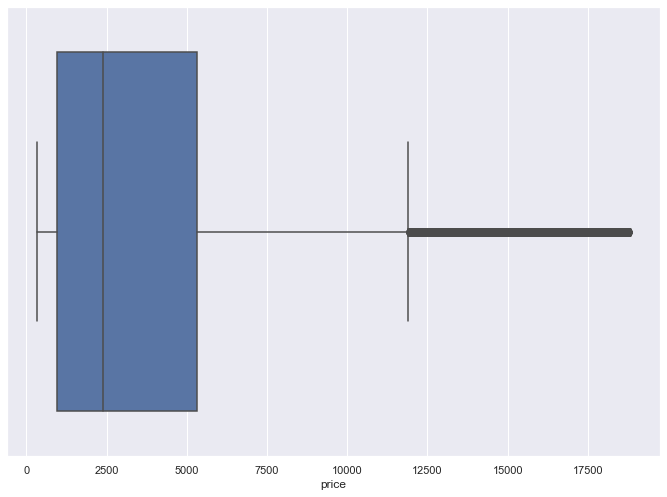

In [30]:
sns.boxplot('price',data=data2)

In [31]:
data2.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

carat    0.921548
x        0.884504
y        0.865395
z        0.861208
table    0.126566
depth    0.011048
Name: price, dtype: float64

In [32]:
data2=data2.drop('depth',axis=1)

In [33]:
data2.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'price', 'x', 'y', 'z'], dtype='object')

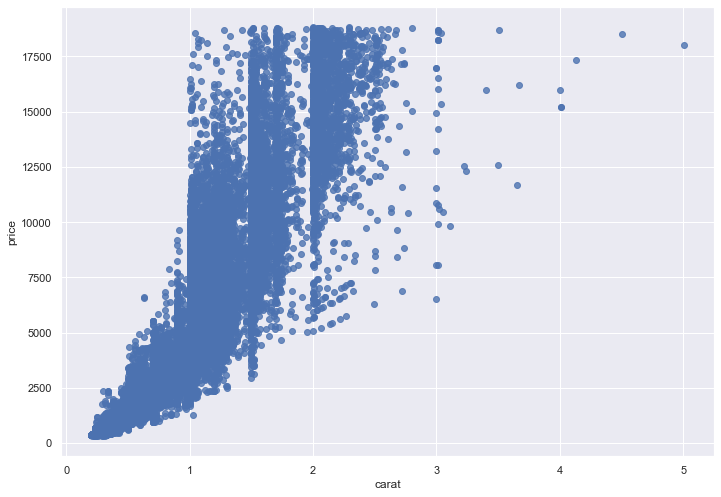

In [34]:
sns.regplot('carat','price',scatter=True,fit_reg=False,data=data2)

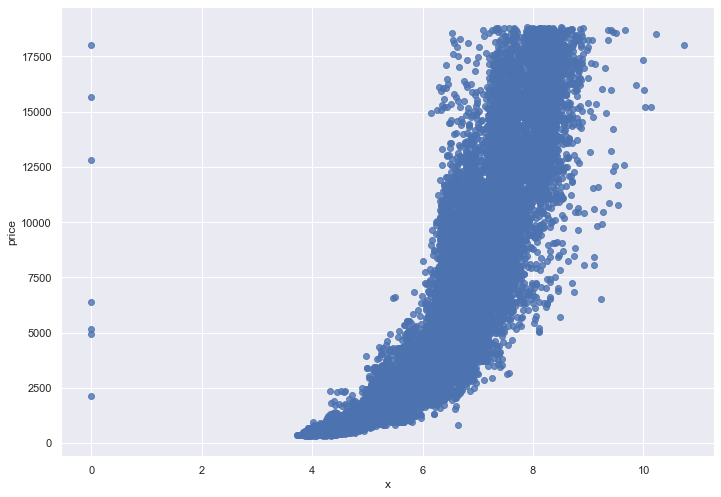

In [35]:
sns.regplot('x','price',scatter=True,fit_reg=False,data=data2)

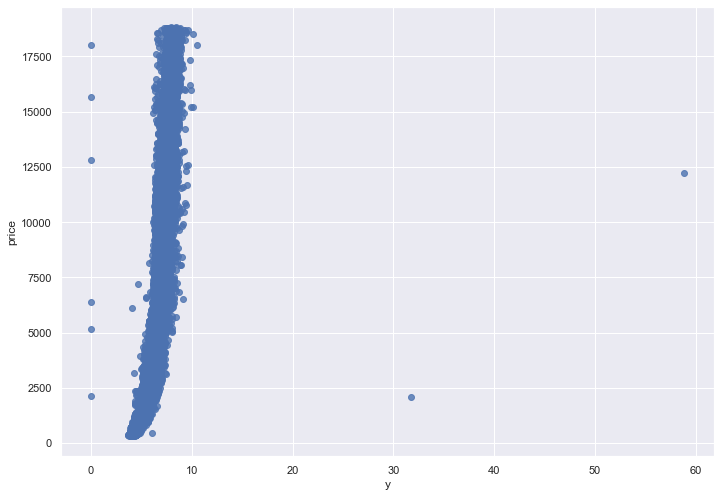

In [36]:
sns.regplot('y','price',scatter=True,fit_reg=False,data=data2)

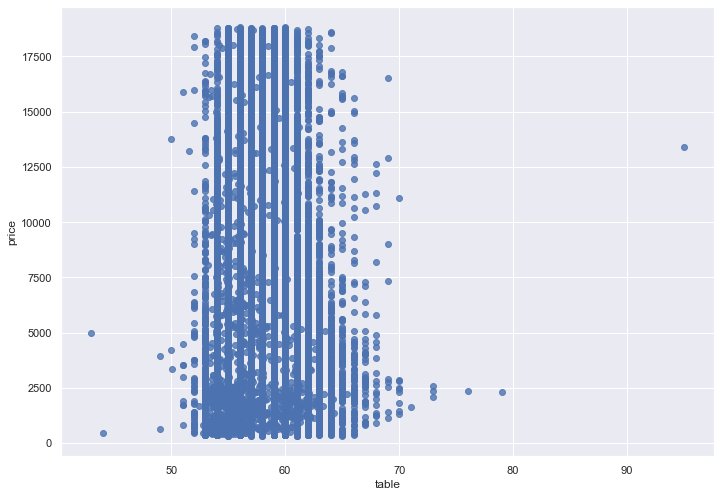

In [37]:
sns.regplot('table','price',scatter=True,fit_reg=False,data=data2)

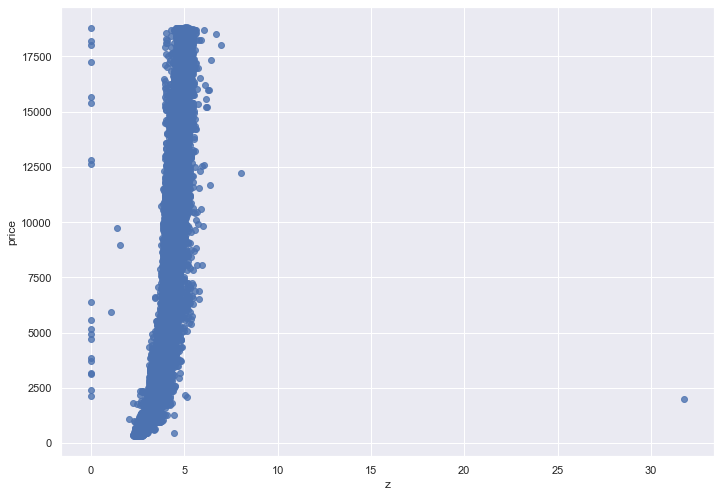

In [38]:
sns.regplot('z','price',scatter=True,fit_reg=False,data=data2)

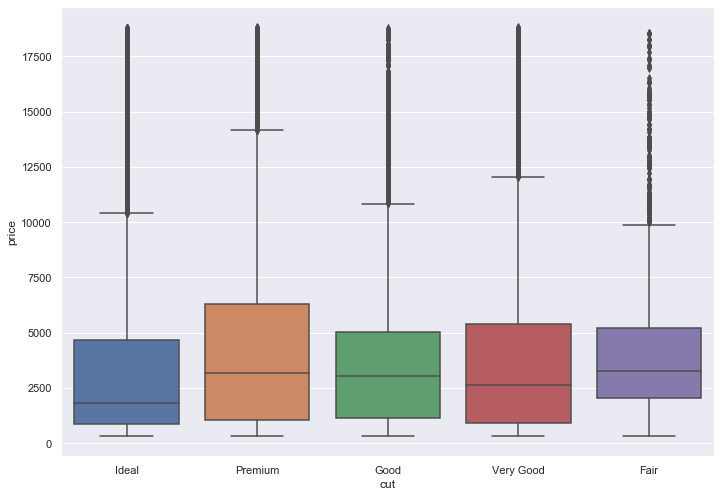

In [186]:
sns.boxplot('cut','price',data=data2)

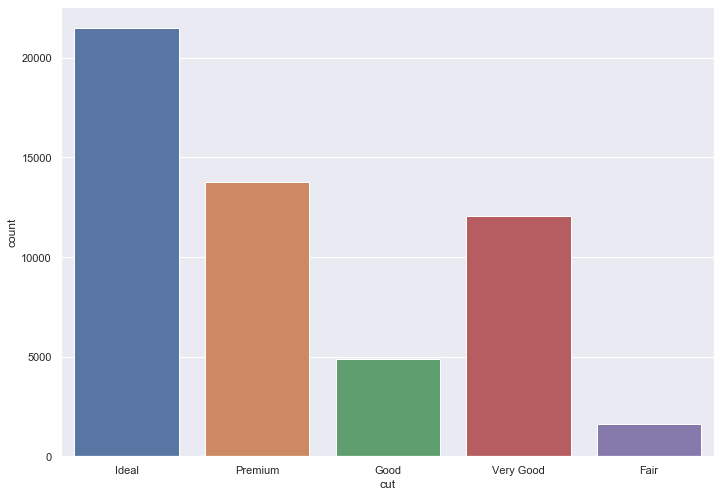

In [187]:
cut=sns.countplot(data2['cut'])

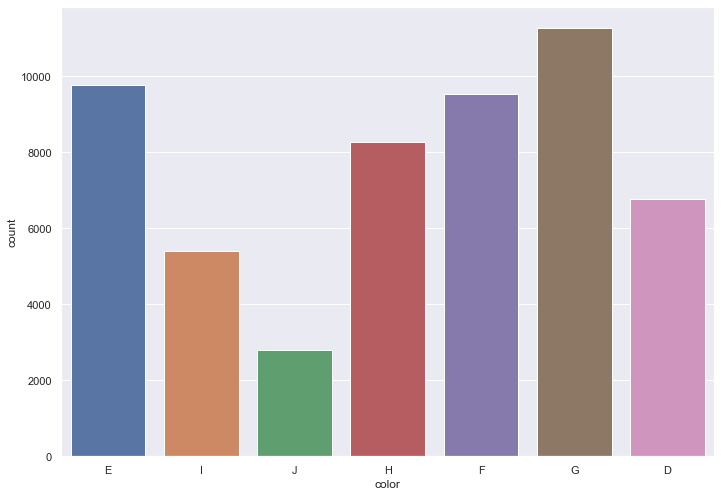

In [188]:
sns.countplot(data2['color'])

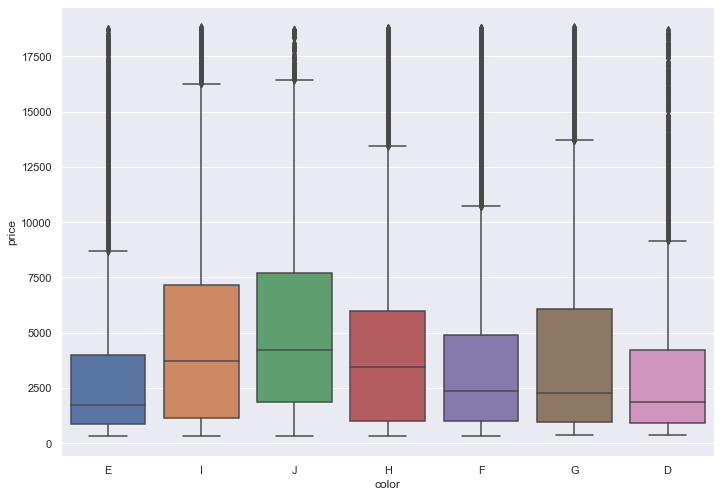

In [189]:
sns.boxplot('color','price',data=data2)

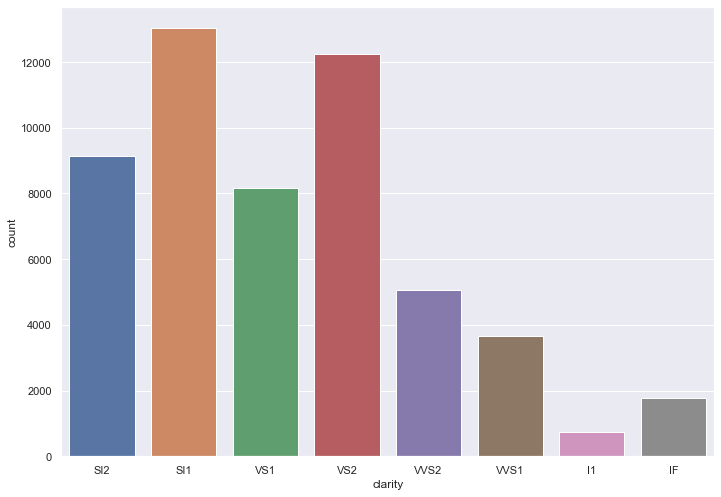

In [190]:
sns.countplot(data2['clarity'])

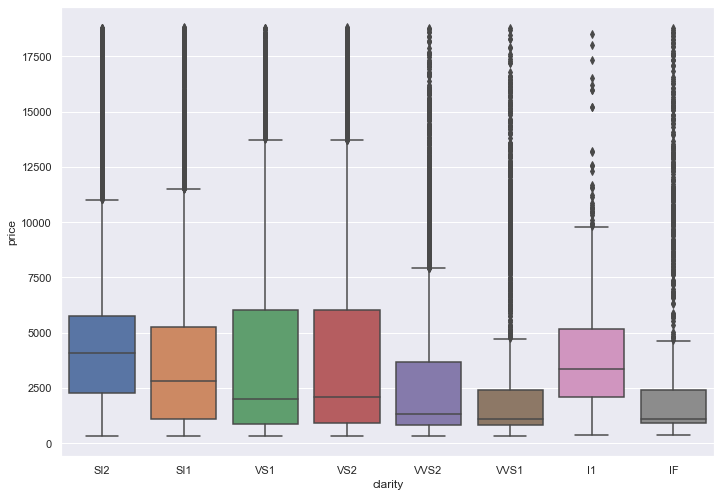

In [191]:
sns.boxplot('clarity','price',data=data2)

In [41]:
data_diamond=pd.get_dummies(data2,drop_first=True)

In [43]:
data_diamond.shape

(53794, 23)

In [44]:
data_diamond.columns

Index(['carat', 'table', 'price', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [196]:
x=data_diamond.drop('price',axis=1,inplace=False)
y=data_diamond['price']

In [197]:
y

0         326
1         326
2         327
3         334
4         335
5         336
6         336
7         337
8         337
9         338
10        339
11        340
12        342
13        344
14        345
15        345
16        348
17        351
18        351
19        351
20        351
21        352
22        353
23        353
24        353
25        354
26        355
27        357
28        357
29        357
         ... 
53910    2753
53911    2753
53912    2753
53913    2753
53914    2753
53915    2753
53916    2753
53917    2753
53918    2753
53919    2753
53920    2755
53921    2755
53922    2755
53923    2756
53924    2756
53925    2756
53926    2756
53927    2756
53928    2756
53929    2756
53930    2756
53931    2756
53932    2757
53933    2757
53934    2757
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53794, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F81826390>,
      dtype=object)

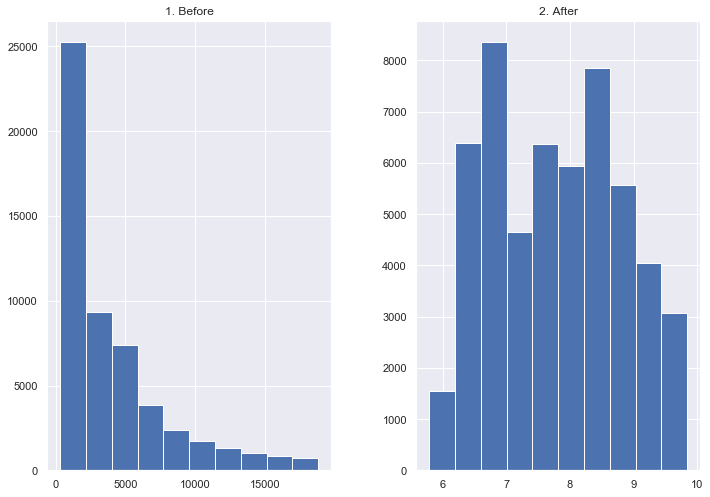

In [198]:
prices=pd.DataFrame({'1. Before':y,'2. After':np.log(y)})
prices.hist()

In [199]:
y=np.log(y)

In [200]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)

In [201]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(37655, 22) (16139, 22) (37655,) (16139,)


In [218]:
base_pred=np.mean(y_test)
base_pred

7.790030556545191

In [219]:
base_pred=np.repeat(base_pred,len(y_test))

In [222]:
base_pred

array([7.79003056, 7.79003056, 7.79003056, ..., 7.79003056, 7.79003056,
       7.79003056])

In [221]:
base_root_mean_square_error=np.sqrt(mean_squared_error(y_test,base_pred))
base_root_mean_square_error

1.0105015702040412

In [202]:
lgr=LinearRegression(fit_intercept=True)

In [203]:
model_lin1=lgr.fit(x_train,y_train)

In [204]:
diamond_predictions_lin1=lgr.predict(x_test)

In [205]:
diamond_predictions_lin1

array([8.67067729, 7.28583475, 8.2781317 , ..., 6.47535427, 7.41175366,
       8.96132464])

In [206]:
print(y_test.shape,diamond_predictions_lin1.shape)

(16139,) (16139,)


In [223]:
lin_mse1=mean_squared_error(y_test,diamond_predictions_lin1) #mse and rmse
lin_rmse1=np.sqrt(lin_mse1)

In [208]:
lin_mse1

0.027554497183195224

In [209]:
lin_rmse1

0.16599547338164142

In [210]:
r2_lin_test1=model_lin1.score(x_test,y_test)    #R squared value
r2_lin_train1=model_lin1.score(x_train,y_train)

In [211]:
print(r2_lin_test1,r2_lin_train1)

0.9730152434076752 0.965520044395029


In [212]:
residuals1=y_test-diamond_predictions_lin1
residuals1

7865    -0.302680
42063   -0.138275
6433     0.026858
50215   -0.034888
33906    0.257850
49365   -0.073111
37182    0.021859
53822    0.001080
1052    -0.236031
15133   -0.094384
28358   -0.182889
11911    0.289447
1278     0.002328
8172    -0.044384
22297    0.049465
3580     0.341535
8714    -0.269693
35552   -0.054602
24242   -0.112333
51582    0.027214
28675    0.116774
28599    0.068647
26822   -0.076593
32308   -0.163779
9998    -0.062660
25817   -0.214504
35389   -0.198419
18230    0.211478
24071   -0.364168
15290   -0.062219
           ...   
45546    0.079959
18043   -0.166983
31087   -0.091215
26095    0.100043
38606   -0.207181
19654    0.088801
32033   -0.147951
26159   -0.035778
28878    0.042103
16885    0.239705
11654   -0.114282
3548    -0.012331
22113    0.096624
7727     0.131736
18429    0.011604
51670    0.069803
8262    -0.047448
21637   -0.089795
16360   -0.214391
19284    0.068993
10599   -0.200902
31447    0.124551
43320    0.050316
22905    0.028585
3028     0

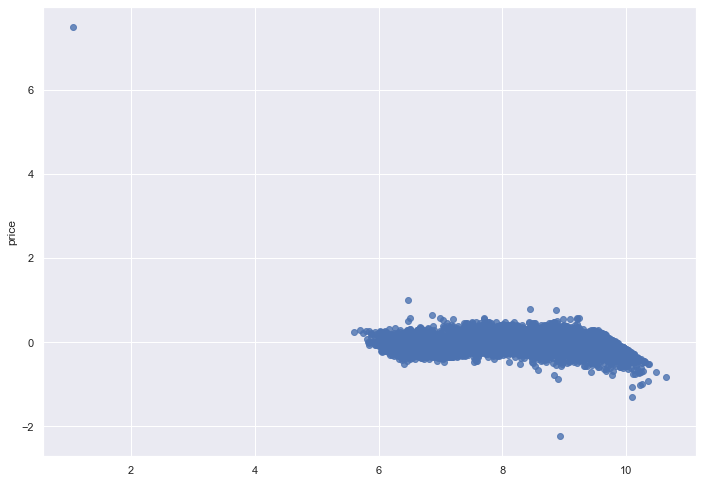

In [213]:
sns.regplot(x=diamond_predictions_lin1,y=residuals1,scatter=True,fit_reg=False,data=data2)

In [214]:
residuals1.describe()

count    16139.000000
mean        -0.000606
std          0.166000
min         -2.223615
25%         -0.098039
50%          0.002766
75%          0.101731
max          7.482612
Name: price, dtype: float64

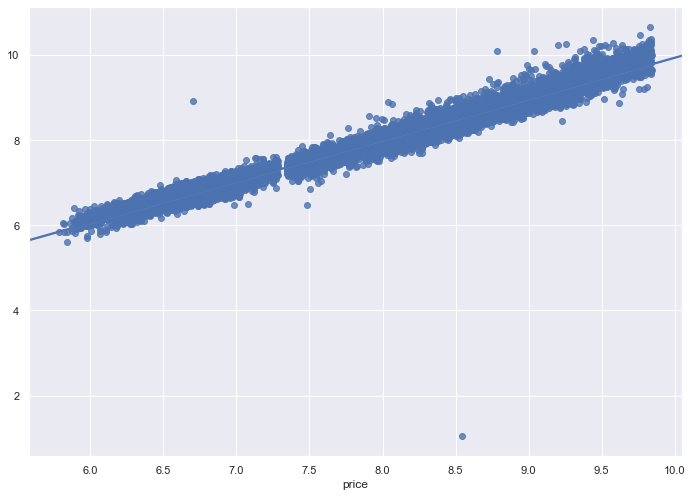

In [216]:
sns.regplot(y_test,diamond_predictions_lin1,scatter=True,fit_reg=True,data=data2)